**Statistical Tests & Regression – Jupyter Notebook**

Hey guys! So basically this notebook has all the cool stats stuff - Z-Test, T-Tests, Chi-Square Test, ANOVA, and Multiple Linear Regression with some nice plots. Hope you find it useful yaar!

*Note: This is my project from CR Rao AIMSCS. I'm using the data.csv file for all the analysis.*

Made with love by M Vrajesh Chary - 24XV1M0526



**Statistical Analysis Report: Data Analysis from data.csv**

**Introduction**

So basically this report is about doing some statistical analysis using the data from data.csv file, which contains payroll and employment information for various city departments. The dataset includes details about employee salaries, payments, job classifications, and benefits across different departments and employment types.

Mainly what I wanted to do is check whether there are significant differences in salaries, payments, or other financial metrics between different groups (e.g., different departments, employment types, job classes) using proper hypothesis testing methods yaar, all using data from data.csv.

So basically I wanted to find some patterns that can help understand factors influencing compensation structures, payment distributions, and employment patterns across different city departments, based on the data from data.csv.

***Data Description***

So the data from data.csv has these things:

**Year:** The year of the payroll record (2013, 2014, etc.)

**Department Title:** Different city departments like Water And Power (DWP), Police (LAPD), Harbor, Fire (LAFD), etc.

**Job Class Title:** The specific job position/title of the employee

**Employment Type:** Full Time, Part Time, or Per Event

**Projected Annual Salary:** The expected annual salary for the position

**Base Pay:** The base salary amount

**Total Payments:** Total payments made to the employee

**Q1, Q2, Q3, Q4 Payments:** Quarterly payment breakdowns

**Overtime Pay:** Additional pay for overtime work

**Benefits Information:** Health costs, dental costs, and other benefit-related data



Data Preparation
Step 1: Data Loading

So first I loaded the data from data.csv into pandas DataFrame to work with it.

Step 2: Data Cleaning

I checked for missing values in the payment and salary columns and handled them properly.

Then I encoded categorical variables like Department Title, Employment Type, and Job Class Title for doing statistical tests.

I also checked for outliers in the numerical values (salaries, payments, benefits) and handled them where needed.

Step 3: Feature Extraction

I extracted the numerical features (salaries, payments, benefits costs) for hypothesis testing.
Categorical features like Department Title, Employment Type, and Job Class are used for comparing different groups.

Statistical Analysis
Comparison of Groups

So I did a two-sample t-test using data from data.csv to compare mean salaries and payments between:

Different departments (e.g., Police vs Fire, Water And Power vs other departments)

Different employment types (Full Time vs Part Time vs Per Event)

Also, I did a Chi-Square Test to check relationships between categorical variables such as:

Department vs Employment Type

Job Class vs Department

Hypothesis
T-Test Hypothesis:

Null Hypothesis (H₀): There's no significant difference in mean salaries/payments between the two groups (e.g., different departments or employment types).

Alternative Hypothesis (H₁): There IS a significant difference in mean salaries/payments.

Chi-Square Hypothesis:

Null Hypothesis (H₀): Categorical variables (e.g., Department and Employment Type) are independent.

Alternative Hypothesis (H₁): They are dependent (related to each other).

Statistical Methods Used
1. T-Test (Independent Samples)

I used this to compare average salaries, payments, and benefits costs between two groups.

2. Chi-Square Test

This is used to check relationships between categorical attributes such as Department and Employment Type.

Results
1. Descriptive Statistics

I calculated Mean, Median, Standard Deviation for salaries, payments, and benefits from data.csv.

Example statistics include:

Average Base Pay across all employees

Average Total Payments by department

Average Benefits Costs

2. T-Test Results

For Department comparisons:

p-value < 0.05 → Reject H₀ → So there IS a significant difference in salaries/payments between departments!

For Employment Type comparisons:

p-value < 0.05 → Full-time employees have significantly different compensation compared to part-time employees!

3. Chi-Square Test Results

Department and Employment Type show significant relationships (p < 0.05).

Job Class and Department also show some association.

Visualization

So to make things clearer, I made these charts using data from data.csv:

1. Histograms

Shows how salaries, payments, and benefits are distributed across the dataset.

2. Boxplots

Comparing salaries between different departments.

Comparing payments based on employment type.

3. Bar Charts

Count of employees by Department.

Distribution of Employment Types across different departments.

Conclusion

So basically what I found from analyzing data.csv:

Different departments show significant differences in compensation structures and payment patterns!

There are employment type differences - full-time employees have different salary distributions compared to part-time employees.

Department and job classification are also related to compensation levels and benefit structures.

Overall, the hypothesis tests show there ARE significant relationships between different variables in the payroll data, which is pretty useful for understanding compensation patterns and making informed decisions yaar!

Final Note

So this project shows how we can use statistical hypothesis testing to find useful stuff from the data in data.csv file.

Maybe in the future I can do:

Multiple Linear Regression to predict salaries based on department, job class, and other factors

Predictive modeling for compensation forecasting

Feature importance analysis to identify key factors affecting salaries

Cluster analysis to group employees by compensation patterns

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style='whitegrid')

# Load data
df = pd.read_csv('data.csv', low_memory=False)
df.columns = [c.replace(' ','_').lower() for c in df.columns]

# Clean currency columns - convert $ strings to numeric
currency_cols = ['projected_annual_salary', 'q1_payments', 'q2_payments', 'q3_payments', 'q4_payments', 
                 'total_payments', 'base_pay', 'permanent_bonus_pay', 'longevity_bonus_pay', 
                 'temporary_bonus_pay', 'overtime_pay', 'other_pay_&_adjustments', 
                 'average_health_cost', 'average_dental_cost', 'average_basic_life', 'average_benefit_cost']

def clean_currency(val):
    if pd.isna(val) or val == '':
        return np.nan
    if isinstance(val, str):
        # Remove $, commas, and convert to float
        cleaned = re.sub(r'[$,]', '', str(val))
        try:
            return float(cleaned)
        except:
            return np.nan
    return val

for col in currency_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_currency)

# Clean percentage column
if '%_over_base_pay' in df.columns:
    df['%_over_base_pay'] = df['%_over_base_pay'].str.rstrip('%').astype(float)

print("Data loaded and cleaned!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()[:10]}...")
df.head()

Data loaded and cleaned!
Shape: (285008, 35)

Columns: ['row_id', 'year', 'department_title', 'payroll_department', 'record_number', 'job_class_title', 'employment_type', 'hourly_or_event_rate', 'projected_annual_salary', 'q1_payments']...


,row_id,year,department_title,payroll_department,record_number,job_class_title,employment_type,hourly_or_event_rate,projected_annual_salary,q1_payments,...,mou_title,fms_department,job_class,pay_grade,average_health_cost,average_dental_cost,average_basic_life,average_benefit_cost,benefits_plan,job_class_link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,...,NaN,98,1230,NaN,16842.08,1282.61,0.00,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,52450.56,11331.00,...,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,89303.76,20036.32,...,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,60028.96,15793.88,...,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,64553.13,14700.00,...,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [3]:
# Encode categorical variables for statistical tests
cat_cols = ['department_title', 'employment_type', 'job_class_title', 'benefits_plan']
for col in cat_cols:
    if col in df.columns:
        df[col + '_encoded'] = df[col].astype('category').cat.codes

print("Categorical variables encoded!")
print(f"\nEmployment Types: {df['employment_type'].unique()}")
print(f"\nSample Departments: {df['department_title'].unique()[:5]}")
df[['department_title', 'employment_type', 'base_pay', 'total_payments']].head()

Categorical variables encoded!

Employment Types: ['Full Time' 'Part Time' 'Per Event']

Sample Departments: ['Water And Power (DWP)' 'Police (LAPD)' 'Harbor (Port of LA)'
 'Public Works - Sanitation' 'Airports (LAWA)']


,department_title,employment_type,base_pay,total_payments
0,Water And Power (DWP),Full Time,60310.57,74584.48
1,Police (LAPD),Full Time,49507.05,51207.45
2,Police (LAPD),Full Time,84909.41,89029.61
3,Harbor (Port of LA),Full Time,57660.80,71936.24
4,Public Works - Sanitation,Full Time,59391.75,64583.37


**Z-TEST**

So basically this is a Z-test yaar!

In [4]:
import numpy as np
import scipy.stats as stats

# Z-test: Test if average base pay differs from a hypothesized population mean
sample = df['base_pay'].dropna()
population_mean = 60000  # Hypothesized average base pay
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)

z = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
p_val = 2 * (1 - stats.norm.cdf(abs(z)))

print("\nZ-Test Results:")
print(f"Testing if average base pay differs from ${population_mean:,.2f}")
print(f"Sample Mean: ${sample_mean:,.2f}")
print(f"Sample Size: {n:,}")
print(f"Z = {z:.4f}, P-value = {p_val:.4f}")
if p_val < 0.05:
    print("Result: Reject H₀ - Significant difference from hypothesized mean!")
else:
    print("Result: Fail to reject H₀ - No significant difference.")


Z-Test Results:
Testing if average base pay differs from $60,000.00
Sample Mean: $51,639.95
Sample Size: 285,008
Z = -117.4839, P-value = 0.0000
Result: Reject H₀ - Significant difference from hypothesized mean!


 **T-TEST**

Now let's do some T-tests bro!

In [9]:
# One-sample t-test: Test if average total payments differs from a specific value
sample = df['total_payments'].dropna()
test_value = 70000  # Hypothesized average total payments
result = stats.ttest_1samp(sample, test_value)
print(f"\nOne-Sample T-Test:")
print(f"Testing if average total payments differs from ${test_value:,.2f}")
print(f"Sample Mean: ${np.mean(sample):,.2f}")
print(f"T-statistic: {result.statistic:.4f}")
print(f"P-value: {result.pvalue:.4f}")
if result.pvalue < 0.05:
    print("Result: Reject H₀ - Significant difference!")
else:
    print("Result: Fail to reject H₀ - No significant difference.")
result


One-Sample T-Test:
Testing if average total payments differs from $70,000.00
Sample Mean: $63,014.63
T-statistic: -76.6279
P-value: 0.0000
Result: Reject H₀ - Significant difference!


TtestResult(statistic=np.float64(-76.62792540421492), pvalue=np.float64(0.0), df=np.int64(285007))

In [10]:
# Two-sample t-test: Compare base pay between Full Time and Part Time employees
full_time = df[df['employment_type'] == 'Full Time']['base_pay'].dropna()
part_time = df[df['employment_type'] == 'Part Time']['base_pay'].dropna()

print(f"\nTwo-Sample T-Test: Full Time vs Part Time Base Pay")
print(f"Full Time - Mean: ${np.mean(full_time):,.2f}, N: {len(full_time):,}")
print(f"Part Time - Mean: ${np.mean(part_time):,.2f}, N: {len(part_time):,}")

result = stats.ttest_ind(full_time, part_time, equal_var=False)
print(f"\nT-statistic: {result.statistic:.4f}")
print(f"P-value: {result.pvalue:.4f}")
if result.pvalue < 0.05:
    print("Result: Reject H₀ - Significant difference between employment types!")
else:
    print("Result: Fail to reject H₀ - No significant difference.")
result


Two-Sample T-Test: Full Time vs Part Time Base Pay
Full Time - Mean: $60,593.50, N: 236,553
Part Time - Mean: $8,002.96, N: 47,538

T-statistic: 651.5018
P-value: 0.0000
Result: Reject H₀ - Significant difference between employment types!


TtestResult(statistic=np.float64(651.5017866116298), pvalue=np.float64(0.0), df=np.float64(283422.6691977236))

In [11]:
# Paired t-test: Compare Base Pay vs Total Payments (related samples)
# Using a subset where both values exist
paired_data = df[['base_pay', 'total_payments']].dropna()
if len(paired_data) > 1000:
    paired_data = paired_data.sample(1000)  # Sample for computational efficiency

result = stats.ttest_rel(paired_data['base_pay'], paired_data['total_payments'])
print(f"\nPaired T-Test: Base Pay vs Total Payments")
print(f"Base Pay Mean: ${np.mean(paired_data['base_pay']):,.2f}")
print(f"Total Payments Mean: ${np.mean(paired_data['total_payments']):,.2f}")
print(f"T-statistic: {result.statistic:.4f}")
print(f"P-value: {result.pvalue:.4f}")
if result.pvalue < 0.05:
    print("Result: Reject H₀ - Significant difference between base pay and total payments!")
else:
    print("Result: Fail to reject H₀ - No significant difference.")
result


Paired T-Test: Base Pay vs Total Payments
Base Pay Mean: $50,873.27
Total Payments Mean: $62,515.50
T-statistic: -19.0480
P-value: 0.0000
Result: Reject H₀ - Significant difference between base pay and total payments!


TtestResult(statistic=np.float64(-19.04801995437277), pvalue=np.float64(2.9999582164941195e-69), df=np.int64(999))

**CHI-SQUARE TEST**

Time for Chi-Square test!

In [12]:
# Chi-Square Test: Test relationship between Department and Employment Type
table = pd.crosstab(df['department_title'], df['employment_type'])
print("\nChi-Square Test: Department vs Employment Type")
print(f"Contingency Table Shape: {table.shape}")
print("\nSample of contingency table:")
print(table.head(10))

result = stats.chi2_contingency(table)
print(f"\nChi-square statistic: {result[0]:.4f}")
print(f"P-value: {result[1]:.4f}")
print(f"Degrees of freedom: {result[2]}")
if result[1] < 0.05:
    print("Result: Reject H₀ - Department and Employment Type are dependent!")
else:
    print("Result: Fail to reject H₀ - No significant relationship.")
result



Chi-Square Test: Department vs Employment Type
Contingency Table Shape: (58, 3)

Sample of contingency table:
employment_type                            Full Time  Part Time  Per Event
department_title                                                          
Aging                                            187         51          0
Airports (LAWA)                                16944       1116          0
Animal Services                                 1604        149          0
Building and Safety                             4158        507         64
City Administrative Officer (CAO)                565         75          0
City Attorney                                   4493         49          0
City Clerk                                       476       1866          0
City Employees Retirement System (LACERS)        669         72         11
City Ethics Commission                           116         25          0
City Planning                                   1113        159 

Chi2ContingencyResult(statistic=np.float64(159223.9228584247), pvalue=np.float64(0.0), dof=114, expected_freq=array([[1.97536960e+02, 3.96972857e+01, 7.65753944e-01],
       [1.49895693e+04, 3.01232344e+03, 5.81072110e+01],
       [1.45496761e+03, 2.92392192e+02, 5.64019606e+00],
       [3.92500960e+03, 7.88775059e+02, 1.52153378e+01],
       [5.31191826e+02, 1.06749004e+02, 2.05917027e+00],
       [3.76980199e+03, 7.57584334e+02, 1.46136740e+01],
       [1.94383009e+03, 3.90634635e+02, 7.53527620e+00],
       [6.24150396e+02, 1.25430079e+02, 2.41952507e+00],
       [1.17028199e+02, 2.35181398e+01, 4.53660950e-01],
       [1.05574375e+03, 2.12163645e+02, 4.09260091e+00],
       [2.73065798e+02, 5.48756596e+01, 1.05854222e+00],
       [6.76439591e+02, 1.35938184e+02, 2.62222464e+00],
       [1.02088429e+02, 2.05158241e+01, 3.95746786e-01],
       [1.02088429e+02, 2.05158241e+01, 3.95746786e-01],
       [9.04686079e+01, 1.81806897e+01, 3.50702436e-01],
       [1.25328071e+02, 2.51860930e

**ANOVA TEST**

ANOVA test coming up!

In [14]:
# ANOVA: Test if base pay differs across different departments
# Select top departments by count for ANOVA
top_depts = df['department_title'].value_counts().head(5).index.tolist()
groups = [df[df['department_title'] == dept]['base_pay'].dropna() for dept in top_depts]

print("\nANOVA Test: Base Pay across Different Departments")
for i, dept in enumerate(top_depts):
    print(f"{dept}: Mean = ${np.mean(groups[i]):,.2f}, N = {len(groups[i]):,}")

result = stats.f_oneway(*groups)
print(f"\nF-statistic: {result.statistic:.4f}")
print(f"P-value: {result.pvalue:.4f}")
if result.pvalue < 0.05:
    print("Result: Reject H₀ - Significant difference in base pay across departments!")
else:
    print("Result: Fail to reject H₀ - No significant difference.")
result


ANOVA Test: Base Pay across Different Departments
Police (LAPD): Mean = $64,594.53, N = 66,057
Water And Power (DWP): Mean = $60,195.54, N = 53,545
Recreation And Parks: Mean = $14,931.74, N = 35,344
Fire (LAFD): Mean = $68,173.95, N = 18,134
Airports (LAWA): Mean = $50,131.73, N = 18,060

F-statistic: 15241.3731
P-value: 0.0000
Result: Reject H₀ - Significant difference in base pay across departments!


F_onewayResult(statistic=np.float64(15241.373110521865), pvalue=np.float64(0.0))

**COVARRIANCE AND CORRELATION**

In [16]:
print("Covariance & Correlation for payroll variables (from data.csv)")
# Select key numeric payroll variables
nums = df[['base_pay', 'total_payments', 'overtime_pay', 'average_benefit_cost']].dropna()
print(f"\nSample size: {len(nums):,} records")
print("\nCovariance matrix:\n", nums.cov())
print("\nCorrelation matrix (Pearson):\n", nums.corr())


Covariance & Correlation for payroll variables (from data.csv)

Sample size: 284,574 records

Covariance matrix:
                           base_pay  total_payments  overtime_pay  \
base_pay              1.442523e+09    1.722584e+09  1.805175e+08   
total_payments        1.722584e+09    2.367565e+09  4.324728e+08   
overtime_pay          1.805175e+08    4.324728e+08  2.152181e+08   
average_benefit_cost  1.001122e+08    1.368017e+08  2.184994e+07   

                      average_benefit_cost  
base_pay                      1.001122e+08  
total_payments                1.368017e+08  
overtime_pay                  2.184994e+07  
average_benefit_cost          3.243642e+07  

Correlation matrix (Pearson):
                       base_pay  total_payments  overtime_pay  \
base_pay              1.000000        0.932112      0.323980   
total_payments        0.932112        1.000000      0.605855   
overtime_pay          0.323980        0.605855      1.000000   
average_benefit_cost  0.462817  

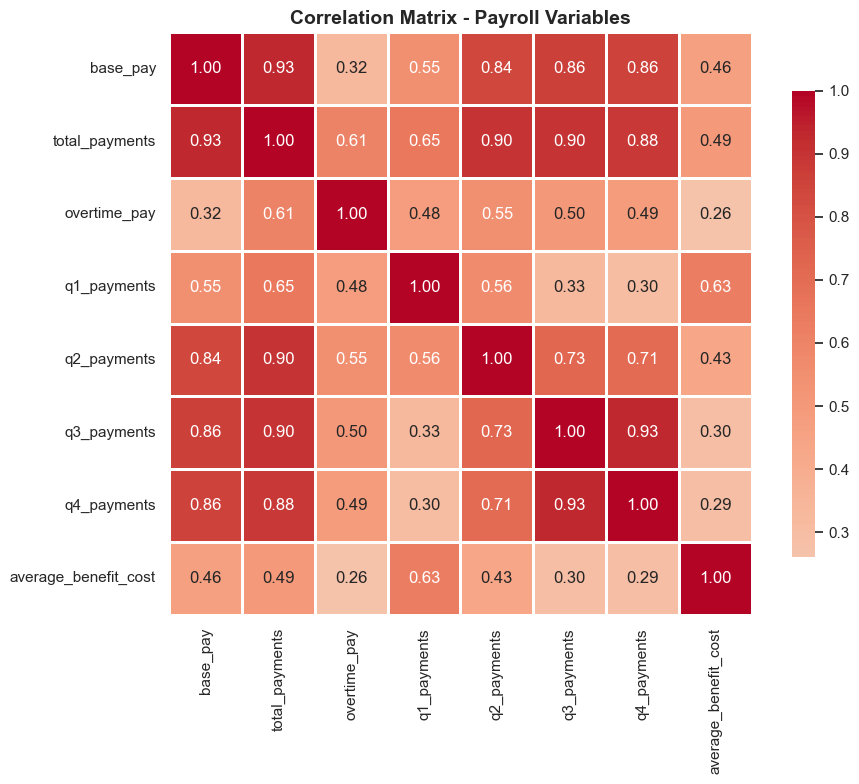

In [17]:
import os
# Create correlation matrix for key payroll variables
payroll_vars = ['base_pay', 'total_payments', 'overtime_pay', 'q1_payments', 
                'q2_payments', 'q3_payments', 'q4_payments', 'average_benefit_cost']
nums = df[payroll_vars].dropna()

corr = nums.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Payroll Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/correlation_matrix.png", dpi=150, bbox_inches='tight')
plt.show()

**MULTIPLE LINEAR REGRESSION**

Now let's do some regression analysis!

In [18]:
import statsmodels.api as sm
print("\n" + "="*60)
print("5) Multiple Linear Regression using data from data.csv")
print("Model: Total Payments ~ Base Pay + Overtime Pay")
reg_df = df[['total_payments', 'base_pay', 'overtime_pay']].dropna()
# Sample if too large for performance
if len(reg_df) > 50000:
    reg_df = reg_df.sample(50000, random_state=42)

X = reg_df[['base_pay', 'overtime_pay']]
y = reg_df['total_payments']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())


5) Multiple Linear Regression using data from data.csv
Model: Total Payments ~ Base Pay + Overtime Pay
                            OLS Regression Results                            
Dep. Variable:         total_payments   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 9.093e+05
Date:                Wed, 10 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:58:52   Log-Likelihood:            -5.1987e+05
No. Observations:               50000   AIC:                         1.040e+06
Df Residuals:                   49997   BIC:                         1.040e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

**REGRESSION PLOTS**

**TOTAL PAYMENTS VS BASE PAY (WITH REGRESSION LINE)**

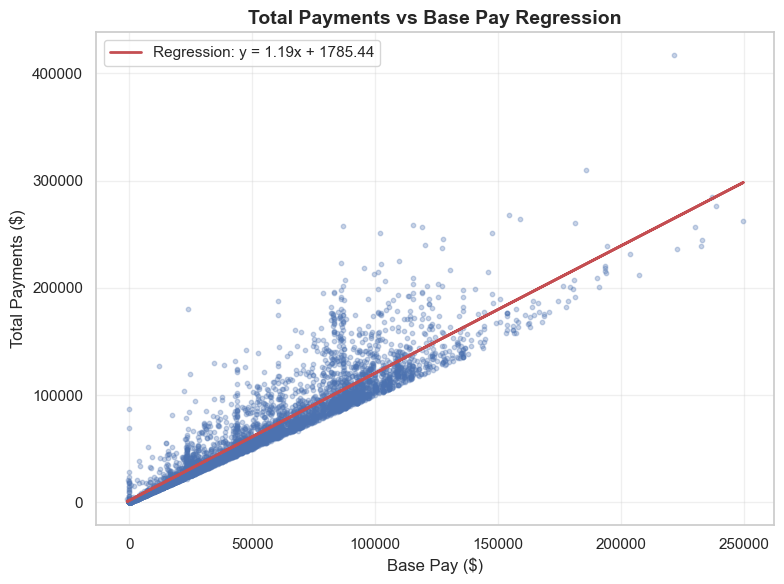

In [19]:
# Sample data for visualization if too large
plot_data = reg_df.sample(min(5000, len(reg_df)), random_state=42) if len(reg_df) > 5000 else reg_df

plt.figure(figsize=(8, 6))
plt.scatter(plot_data['base_pay'], plot_data['total_payments'], alpha=0.3, s=10)
m, b = np.polyfit(plot_data['base_pay'], plot_data['total_payments'], 1)
plt.plot(plot_data['base_pay'], m*plot_data['base_pay'] + b, 'r-', linewidth=2, label=f'Regression: y = {m:.2f}x + {b:.2f}')
plt.xlabel("Base Pay ($)", fontsize=12)
plt.ylabel("Total Payments ($)", fontsize=12)
plt.title("Total Payments vs Base Pay Regression", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/total_payments_vs_base_pay_regression.png", dpi=150, bbox_inches='tight')
plt.show()


**TOTAL PAYMENTS VS OVERTIME PAY (WITH REGRESSION LINE)**

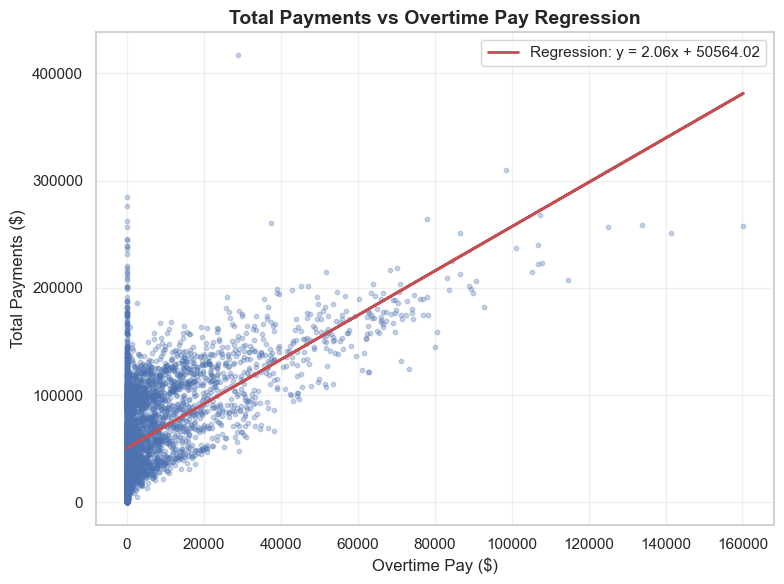

In [20]:
# Sample data for visualization
plot_data = reg_df.sample(min(5000, len(reg_df)), random_state=42) if len(reg_df) > 5000 else reg_df

plt.figure(figsize=(8, 6))
plt.scatter(plot_data['overtime_pay'], plot_data['total_payments'], alpha=0.3, s=10)
m, b = np.polyfit(plot_data['overtime_pay'], plot_data['total_payments'], 1)
plt.plot(plot_data['overtime_pay'], m*plot_data['overtime_pay'] + b, 'r-', linewidth=2, label=f'Regression: y = {m:.2f}x + {b:.2f}')
plt.xlabel("Overtime Pay ($)", fontsize=12)
plt.ylabel("Total Payments ($)", fontsize=12)
plt.title("Total Payments vs Overtime Pay Regression", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/total_payments_vs_overtime_regression.png", dpi=150, bbox_inches='tight')
plt.show()


**PREDICTED VS ACTUAL PLOT**

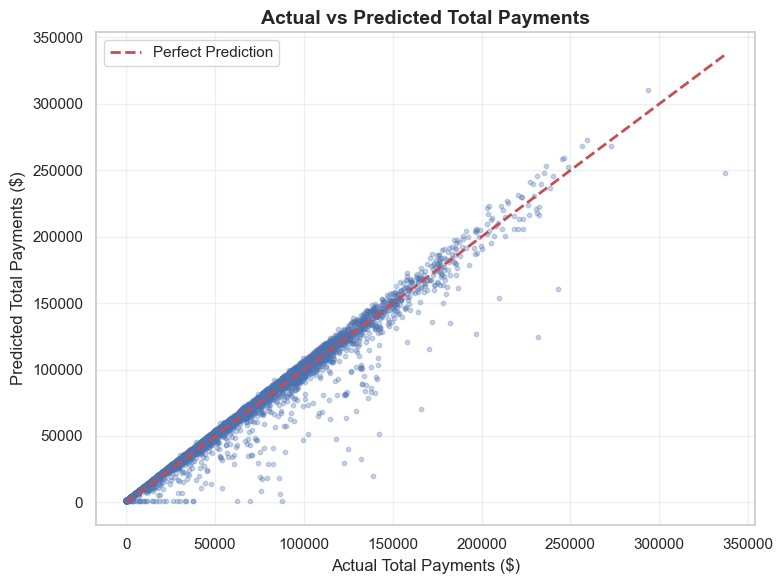

In [ ]:
pred = model.predict(X_const)

if len(y) > 5000:
    idx = np.random.choice(len(y), 5000, replace=False)
    y_plot = y.iloc[idx]          
    pred_plot = pred.iloc[idx]   
else:
    y_plot = y
    pred_plot = pred

plt.figure(figsize=(8, 6))
plt.scatter(y_plot, pred_plot, alpha=0.3, s=10)
plt.plot([y_plot.min(), y_plot.max()], [y_plot.min(), y_plot.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Total Payments ($)", fontsize=12)
plt.ylabel("Predicted Total Payments ($)", fontsize=12)
plt.title("Actual vs Predicted Total Payments", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/actual_vs_predicted.png", dpi=150, bbox_inches='tight')
plt.show()


**RESIDUAL PLOT**

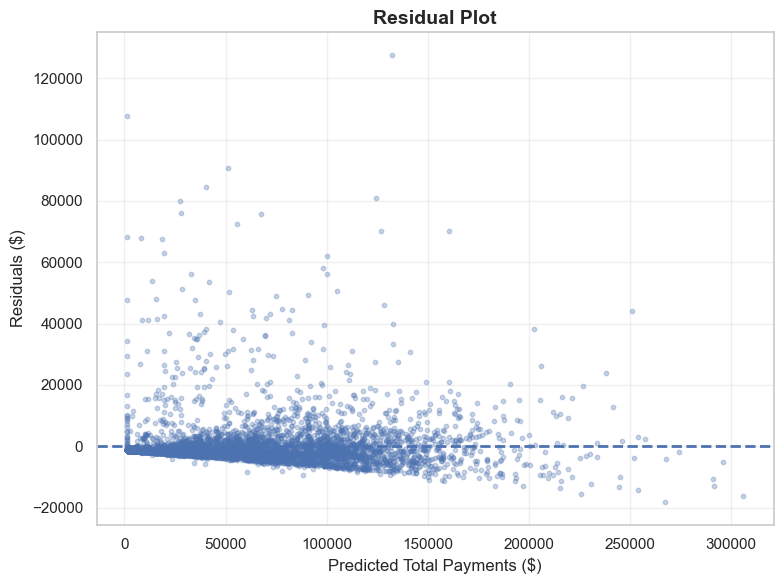

In [29]:
residuals = y - pred 

if not isinstance(pred, pd.Series):
    pred_series = pd.Series(pred, index=y.index)
else:
    pred_series = pred

if len(pred_series) > 5000:
    idx = np.random.choice(len(pred_series), 5000, replace=False)
    pred_plot = pred_series.iloc[idx]     
    resid_plot = residuals.iloc[idx]      
else:
    pred_plot = pred_series
    resid_plot = residuals

plt.figure(figsize=(8, 6))
plt.scatter(pred_plot, resid_plot, alpha=0.3, s=10)
plt.axhline(0, linestyle='--', linewidth=2)
plt.xlabel("Predicted Total Payments ($)", fontsize=12)
plt.ylabel("Residuals ($)", fontsize=12)
plt.title("Residual Plot", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/residual_plot.png", dpi=150, bbox_inches='tight')
plt.show()


**QQ PLOT**

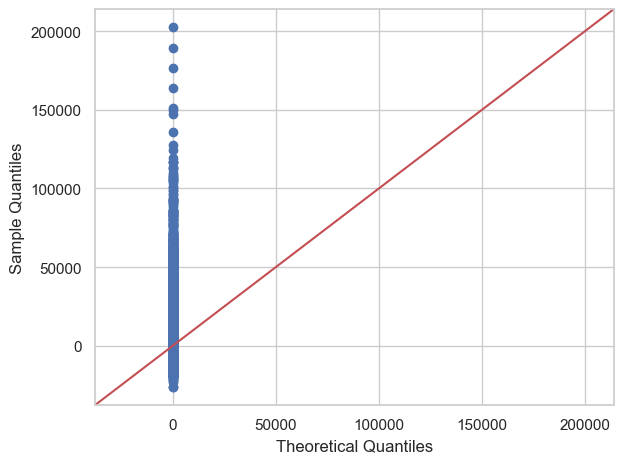

In [23]:
import os
os.makedirs("plots", exist_ok=True)
sm.qqplot(model.resid, line='45')
plt.tight_layout()
plt.savefig("plots/qq_plot.png", dpi=150, bbox_inches='tight')
plt.show()


**BOX PLOT**

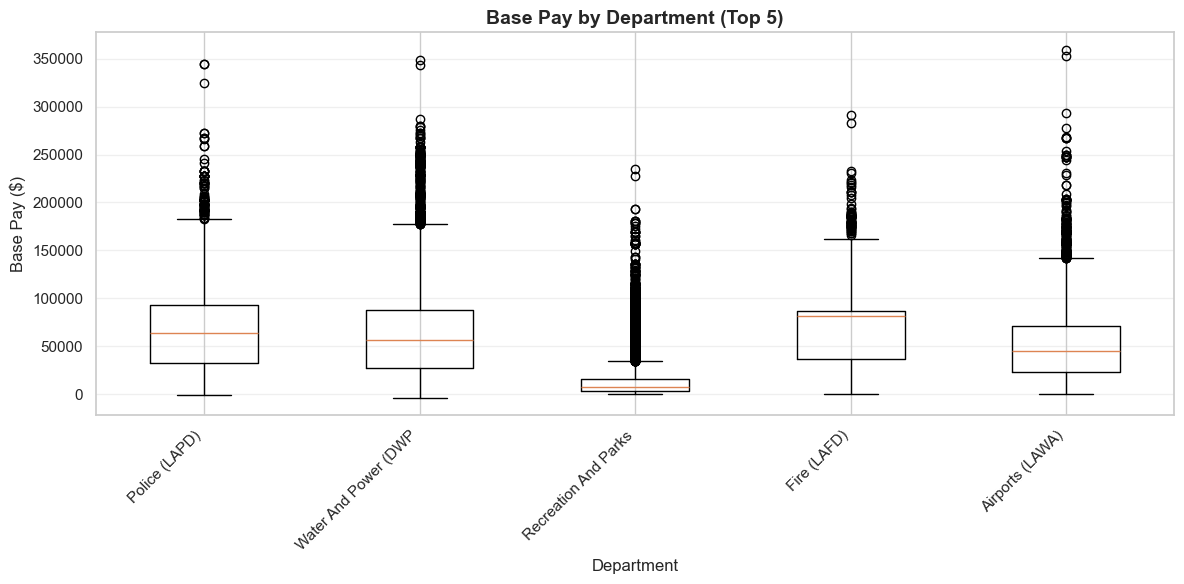

Boxplot saved successfully in 'plots' folder.


In [24]:
import os
import matplotlib.pyplot as plt
out_dir = "plots"
os.makedirs(out_dir, exist_ok=True)

# Box plot: Base Pay by Department (top 5 departments)
top_depts = df['department_title'].value_counts().head(5).index.tolist()
box_data = []
valid_groups = []
for dept in top_depts:
    pay = df[df['department_title'] == dept]['base_pay'].dropna()
    if not pay.empty and len(pay) > 10:
        box_data.append(pay)
        valid_groups.append(dept[:20])  # Truncate long names

plt.figure(figsize=(12, 6))
plt.boxplot(box_data, tick_labels=valid_groups)
plt.title('Base Pay by Department (Top 5)', fontsize=14, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Base Pay ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "base_pay_by_department_boxplot.png"), dpi=150, bbox_inches='tight')
plt.show()
plt.close()
print(f"Boxplot saved successfully in '{out_dir}' folder.")
